In [2]:
import sys
if '/home/ross/immunova' not in sys.path:
    sys.path.append('/home/ross/immunova')
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating
from immunova.flow.gating.defaults import ChildPopulationCollection
from immunova.flow.gating.utilities import centroid, multi_centroid_calculation
from immunova.flow.plotting.static_plots import Plot
from immunova.data.mongo_setup import test_init
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN, KMeans
from multiprocessing import Pool, cpu_count
from functools import partial
from itertools import cycle
from datetime import datetime
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd
import numpy as np
import functools
import warnings
import os
warnings.filterwarnings('ignore')
test_init()

In [3]:
exp = FCSExperiment.objects(experiment_id='ILTIS_T1').get()

In [4]:
samples = exp.list_samples()

In [8]:
def visualise_manual_threshold2d(sample_go, parent_population, x, y, tx, ty, transform):
    data = sample_go.get_population_df(parent_population, transform=transform, transform_features=[x, y]).copy()
    fig, ax = plt.subplots(figsize=(5,5))
    ax.hist2d(data[x], data[y], bins=500, norm=LogNorm())
    ax.axvline(tx, c='r')
    ax.axhline(ty, c='r')
    fig.show()

In [77]:
hc = Gating(exp, 'hc12')

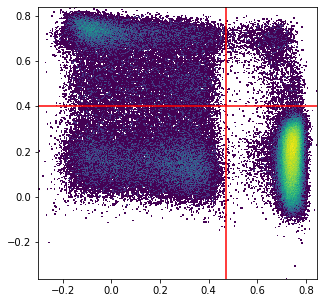

In [78]:
tx, ty = 0.47, 0.4
visualise_manual_threshold2d(hc, 'manual_classic', 'CD4', 'CD8', tx, ty, transform=True)

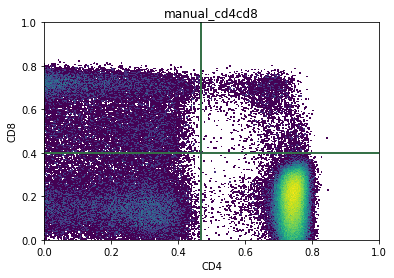

In [79]:
child_populations = ChildPopulationCollection('threshold_2d')
child_populations.add_population('manual_cd4', definition=['+-'])
child_populations.add_population('manual_cd8', definition=['-+'])
child_populations.add_population('manual_other', definition=['++', '--'])

gate_definition = dict(x='CD4', y='CD8', threshold_x=tx, threshold_y=ty)
hc.create_gate(gate_name='manual_cd4cd8', parent='manual_classic', class_='Static', method='threshold_2d',
                kwargs=gate_definition, child_populations=child_populations)
hc.apply('manual_cd4cd8')

In [80]:
hc.save(overwrite=True)

Saved successfully!


True

In [98]:
for x in samples:
    hc = Gating(exp, x)
    child_populations = ChildPopulationCollection('cluster')
    child_populations.add_population('dbscan_maits', target=(0.7, 0.7), weight=1)
    child_populations.add_population('dbscan_classic', target=(0.2, 0.2), weight=1)
    gate_definition = dict(x='Va7.2', y='CD161', min_pop_size=100, distance_nn=0.03, frac=0.1)
    hc.create_gate(gate_name='dbscan_maits', parent='manual_liveCD3', class_='DensityBasedClustering', 
                   method='dbscan', kwargs=gate_definition, child_populations=child_populations)
    hc.apply('dbscan_maits', plot_output=False)
    hc.save(overwrite=True)

Error: gate with name dbscan_maits already exists.
Error: population dbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dbscan_maits already exists.
Error: population dbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dbscan_maits already exists.
Error: population dbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dbscan_maits already exists.
Error: population dbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dbscan_maits already exists.
Error: population dbscan_maits al

In [99]:
for x in samples:
    hc = Gating(exp, x)
    child_populations = ChildPopulationCollection('cluster')
    child_populations.add_population('hdbscan_maits', target=(0.7, 0.7), weight=1)
    child_populations.add_population('hdbscan_classic', target=(0.2, 0.2), weight=1)
    gate_definition = dict(x='Va7.2', y='CD161', min_pop_size=100, frac=0.1)
    hc.create_gate(gate_name='hdbscan_maits', parent='manual_liveCD3', class_='DensityBasedClustering', 
                   method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
    hc.apply('hdbscan_maits', plot_output=False)
    hc.save(overwrite=True)

Error: gate with name hdbscan_maits already exists.
Error: population hdbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name hdbscan_maits already exists.
Error: population hdbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name hdbscan_maits already exists.
Error: population hdbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name hdbscan_maits already exists.
Error: population hdbscan_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name hdbscan_maits already exists.
Error: population hdbsca

In [100]:
for x in samples:    
    hc = Gating(exp, x)
    child_populations = ChildPopulationCollection('geom')
    child_populations.add_population('gmm_maits', definition='+')
    child_populations.add_population('gmm_classic', definition='-')
    gate_definition = dict(x='Va7.2', y='CD161', conf=0.99, k=5, target=(0.7, 0.7))
    hc.create_gate(gate_name='gmm_maits', parent='manual_liveCD3', class_='MixtureModel', 
                   method='gate', kwargs=gate_definition, child_populations=child_populations)
    hc.apply('gmm_maits', plot_output=False)
    hc.save(overwrite=True)

Error: gate with name gmm_maits already exists.
Error: population gmm_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name gmm_maits already exists.
Error: population gmm_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name gmm_maits already exists.
Error: population gmm_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name gmm_maits already exists.
Error: population gmm_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name gmm_maits already exists.
Error: population gmm_maits already exists, if you wish to o

In [101]:
for x in samples:    
    hc = Gating(exp, x)
    child_populations = ChildPopulationCollection('threshold_2d')
    child_populations.add_population('dens2d_maits', definition='++')
    child_populations.add_population('dens2d_classic', definition=['--', '+-', '-+'])
    gate_definition = dict(x='Va7.2', y='CD161', kde_bw=0.1)
    hc.create_gate(gate_name='dens2d_maits', parent='manual_liveCD3', class_='DensityThreshold', 
                     method='gate_2d', kwargs=gate_definition, child_populations=child_populations)
    hc.apply('dens2d_maits', plot_output=False)
    hc.save(overwrite=True)

Exception ignored in: <bound method Cursor.__del__ of <pymongo.cursor.Cursor object at 0x7f3bf5090160>>
Traceback (most recent call last):
  File "/home/ross/immunova/env/lib/python3.6/site-packages/pymongo/cursor.py", line 237, in __del__
    def __del__(self):
KeyboardInterrupt


Error: gate with name dens2d_maits already exists.
Error: population dens2d_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dens2d_maits already exists.
Error: population dens2d_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dens2d_maits already exists.
Error: population dens2d_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dens2d_maits already exists.
Error: population dens2d_maits already exists, if you wish to overwrite this population please remove it with the remove_population method and then try again
Saved successfully!
Error: gate with name dens2d_maits already exists.
Error: population dens2d_maits al

In [70]:
def calc_sample_frac(sep, parent):
    n = sep.get_population_df(parent).shape[0]
    frac = 0.2
    if n < 40000:
        return 0.99
    else:
        for x in [0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1, 0.08, 0.05, 0.03, 0.02, 0.01, 0.005, 0.001, 0.0005]:
            if n*x < 40000:
                return x

In [ ]:
for x in samples:
    sep = Gating(exp, x)
            
    parent = 'manual_classic'
    frac = calc_sample_frac(sep, parent)
    child_populations = ChildPopulationCollection('geom')
    child_populations.add_population('gmm_cd4', definition='+')
    child_populations.add_population('gmm_notcd4', definition='-')
    gate_definition = dict(x='CD4', y='CD8', target=(0.7, 0.2), k=3, conf=0.99)
    sep.create_gate(gate_name='gmm_cd4', parent='manual_classic',  class_='MixtureModel', method='gate',
                    kwargs=gate_definition, child_populations=child_populations)
    sep.apply('gmm_cd4', plot_output=False)
    
    child_populations = ChildPopulationCollection('threshold_2d')
    child_populations.add_population('dens2d_cd4', definition=['+-'])
    child_populations.add_population('dens2d_cd8', definition=['-+'])
    child_populations.add_population('dens2d_notcd4cd8', definition=['++', '--'])
    gate_definition = dict(x='CD4', y='CD8', kde_bw=0.05, frac=frac)
    sep.create_gate(gate_name='dens2d_cd4cd8', parent='manual_classic', class_='DensityThreshold', 
                     method='gate_2d', kwargs=gate_definition, child_populations=child_populations)
    sep.apply('dens2d_cd4cd8', plot_output=False)
    sep.save(overwrite=True)

In [72]:
for x in samples:
    sep = Gating(exp, x)
    print(f'Gating CD4 CD8 {x}...')
    parent = 'manual_classic'
    frac = calc_sample_frac(sep, parent)
    #GMM
    try:
        child_populations = ChildPopulationCollection('geom')
        child_populations.add_population('gmm_cd4', definition='+')
        child_populations.add_population('gmm_notcd4', definition='-')
        gate_definition = dict(x='CD4', y='CD8', target=(0.7, 0.2), k=3, conf=0.99)
        sep.create_gate(gate_name='gmm_cd4', parent='manual_classic',  class_='MixtureModel', method='gate',
                        kwargs=gate_definition, child_populations=child_populations)
        sep.apply('gmm_cd4', plot_output=False)
        
        child_populations = ChildPopulationCollection('geom')
        child_populations.add_population('gmm_cd8', definition='+')
        child_populations.add_population('gmm_notcd8', definition='-')
        gate_definition = dict(x='CD4', y='CD8', target=(0.2, 0.7), k=3, conf=0.99)
        sep.create_gate(gate_name='gmm_cd8', parent='manual_classic',  class_='MixtureModel', method='gate',
                        kwargs=gate_definition, child_populations=child_populations)
        sep.apply('gmm_cd8', plot_output=False)
    except Exception as e:
        print(f'GMM FAILED: {e}')
    #DBSCAN
    try:
        child_populations = ChildPopulationCollection('cluster')
        child_populations.add_population('dbscan_cd4', target=(0.7, 0.2), weight=1)
        child_populations.add_population('dbscan_cd8', target=(0.2, 0.7), weight=1)
        gate_definition = dict(x='CD4', y='CD8', min_pop_size=100, distance_nn=0.03, frac=frac, downsample_method='density')
        sep.create_gate(gate_name='dbscan_cd4cd8', parent='manual_classic', class_='DensityBasedClustering', 
                         method='dbscan', kwargs=gate_definition, child_populations=child_populations)
        sep.apply('dbscan_cd4cd8', plot_output=False)
    except Exception as e:
        print(f'DBSCAN FAILED: {e}')
    #HDBSCAN
    try:
        child_populations = ChildPopulationCollection('cluster')
        child_populations.add_population('hdbscan_cd4', target=(0.7, 0.2), weight=1)
        child_populations.add_population('hdbscan_cd8', target=(0.2, 0.7), weight=1)
        gate_definition = dict(x='CD4', y='CD8', min_pop_size=100, frac=frac, downsample_method='density')
        sep.create_gate(gate_name='hdbscan_cd4cd8', parent='manual_classic', class_='DensityBasedClustering', 
                         method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
        sep.apply('hdbscan_cd4cd8', plot_output=False)
    except Exception as e:
        print(f'HDBSCAN FAILED: {e}')
    #DBSCAN
    try:
        child_populations = ChildPopulationCollection('threshold_2d')
        child_populations.add_population('dens2d_cd4', definition=['+-'])
        child_populations.add_population('dens2d_cd8', definition=['-+'])
        child_populations.add_population('dens2d_notcd4cd8', definition=['++', '--'])
        gate_definition = dict(x='CD4', y='CD8', kde_bw=0.05, frac=frac)
        sep.create_gate(gate_name='dens2d_cd4cd8', parent='manual_classic', class_='DensityThreshold', 
                         method='gate_2d', kwargs=gate_definition, child_populations=child_populations)
        sep.apply('dens2d_cd4cd8', plot_output=False)
    except Exception as e:
        print(f'DENS2D FAILED: {e}')
    sep.save(overwrite=True)

Gating CD4 CD8 hc1...
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Gating CD4 CD8 hc4...
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Gating CD4 CD8 hc5...
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Gating CD4 CD8 hc7...
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Gating CD4 CD8 h

In [86]:
gating_performance = dict(sample_id=[], population=[], method=[], accuracy=[], f1_score=[],
                         precision=[], recall=[], fpr=[])

def check_performance(hc, manual_pop, auto_pop, method, parent):
    parent = hc.get_population_df(parent)
    manual_pop_idx = hc.populations[manual_pop].index
    auto_pop_idx = hc.populations[auto_pop].index
    # Apply function and measure time taken
    gating_performance['sample_id'].append(hc.id)
    if manual_pop == 'lymphocytes':
        gating_performance['populations'].append('lymphocytes')
    else:
        gating_performance['population'].append(manual_pop.split('_')[1])
    gating_performance['method'].append(method)
    
    #Pull data
    parent['manual'], parent['auto'] = 0, 0
    parent['manual'] = parent['manual'].mask(parent.index.isin(manual_pop_idx), 1)
    parent['auto'] = parent['auto'].mask(parent.index.isin(auto_pop_idx), 1)
    
    # Rate performance of result
    recall = recall_score(y_true=parent['manual'].values, y_pred=parent['auto'])
    precision = precision_score(y_true=parent['manual'].values, y_pred=parent['auto'])
    accuracy = accuracy_score(y_true=parent['manual'].values, y_pred=parent['auto'])
    f1 = f1_score(y_true=parent['manual'].values, y_pred=parent['auto'])
    gating_performance['f1_score'].append(f1)
    gating_performance['accuracy'].append(accuracy)
    gating_performance['precision'].append(precision)
    gating_performance['recall'].append(recall)
    tn, fp, fn, tp = confusion_matrix(y_pred=parent['auto'], y_true=parent['manual']).ravel()
    gating_performance['fpr'].append(fp/(fp+tn))

In [89]:
for x in samples:
    print(f'Assessing performance for {x}')
    hc = Gating(exp, x)
    if x == 'hc13':
        continue
    for method in ['gmm', 'dbscan', 'hdbscan', 'dens2d']:
        
        auto_pop = f'{method}_lymphocytes'
        check_performance(hc, 'manual_lymphocytes', auto_pop, method, 'cells')
        
        auto_pop = f'{method}_liveCD3'
        check_performance(hc, 'manual_liveCD3', auto_pop, method, 'manual_lymphocytes')
        
        auto_pop = f'{method}_gdt'
        check_performance(hc, 'manual_gdt', auto_pop, method, 'manual_liveCD3')

        auto_pop = f'{method}_mait'
        check_performance(hc, 'manual_mait', auto_pop, method, 'manual_nongdt')
        
        auto_pop = f'{method}_cd4'
        check_performance(hc, 'manual_cd4', auto_pop, method, 'manual_classic')

        auto_pop = f'{method}_cd8'
        check_performance(hc, 'manual_cd8', auto_pop, method, 'manual_classic')

Assessing performance for hc1
Assessing performance for hc4
Assessing performance for hc5
Assessing performance for hc7
Assessing performance for hc9
Assessing performance for hc10
Assessing performance for hc11
Assessing performance for hc12
Assessing performance for hc13
Assessing performance for hc15
Assessing performance for hc16
Assessing performance for hc17
Assessing performance for hc18
Assessing performance for hc19


In [104]:
def rename_method(x):
    if x.split('_')[0] == 'gmm':
        return 'Gaussian Mixture Model'
    if x.split('_')[0] == 'dbscan':
        return 'DBSCAN'
    if x.split('_')[0] == 'hdbscan':
        return 'HDBSCAN'
    if x.split('_')[0] == 'dens2d':
        return 'Density threshold (2D)'
    return x
def rename_populations(x):
    if x == 'lymphocytes':
        return 'Lymphocytes'
    if x == 'liveCD3':
        return 'Live CD3+'
    if x == 'gdt':
        return 'γδ T cells'
    if x == 'mait':
        return 'MAITs'
    if x == 'cd4':
        return 'CD4'
    if x == 'cd8':
        return 'CD8'
    return x
results = pd.DataFrame(gating_performance)
results['method'] = results['method'].apply(rename_method)
results['population'] = results['population'].apply(rename_populations)

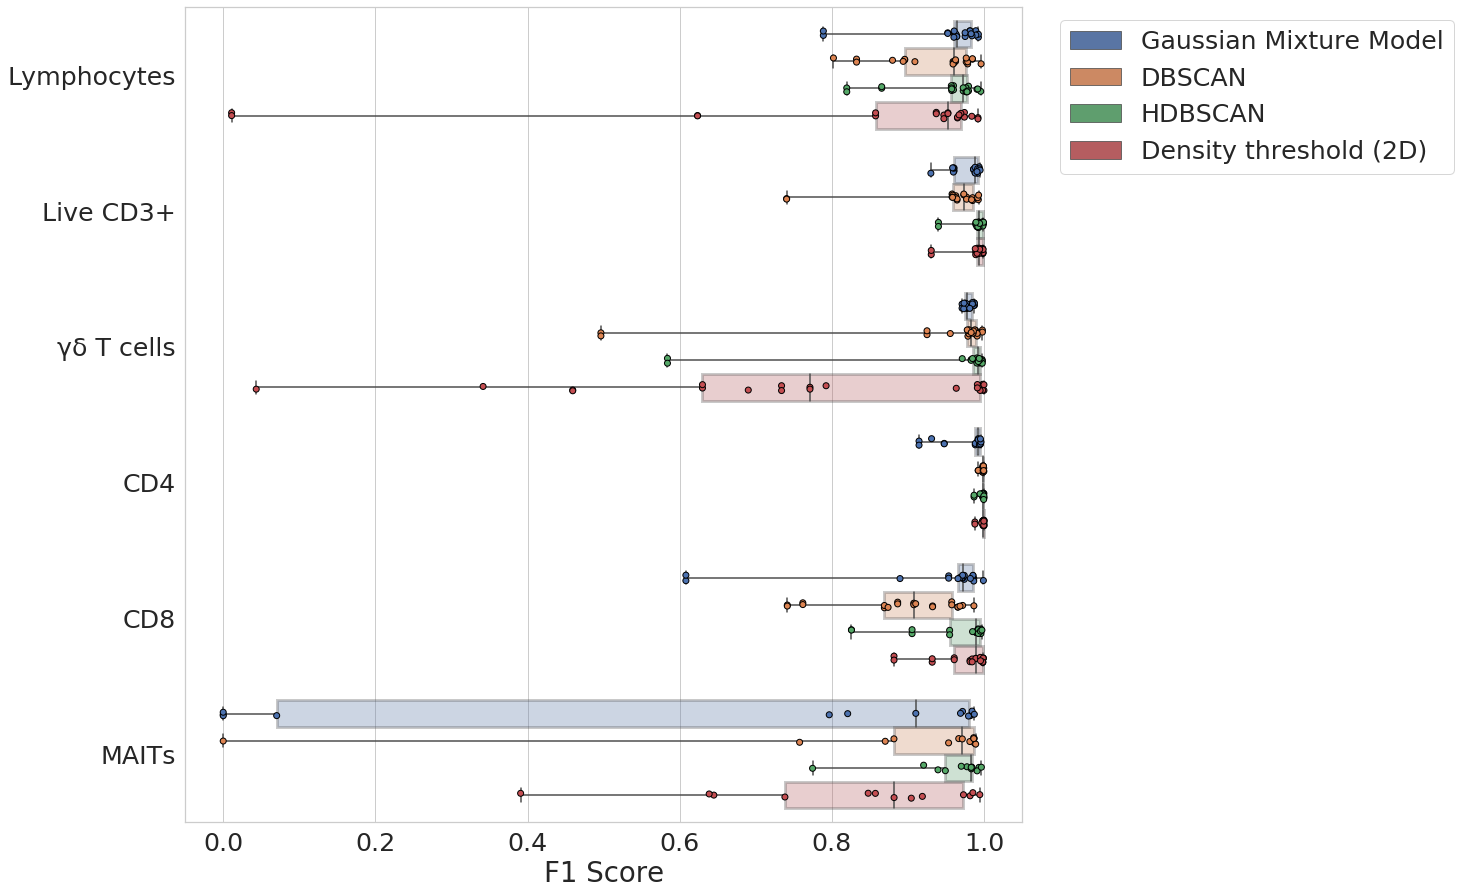

In [105]:
import seaborn as sns
sns.set(font_scale=2.3)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.boxplot(x="f1_score", y="population", data=results, whis=np.inf, hue='method',
                boxprops=dict(alpha=.3, linewidth=3))
ax = sns.stripplot(x="f1_score", y="population", data=results, hue='method', dodge=True, jitter=True,
                  s=6, edgecolor='black', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:4], labels=labels[:4], bbox_to_anchor=(1.03,1))
ax.set_xlabel('F1 Score')
ax.set_ylabel('')
ax.set_xlim(-0.05,1.05)
fig.savefig('HC_Performance.jpg', res=300, bbox_inches='tight')

In [103]:
for x in samples:
    print(f'Assessing performance for {x}')
    hc = Gating(exp, x)
    if x == 'hc13':
        continue
    for method in ['gmm', 'dbscan', 'hdbscan', 'dens2d']:
        auto_pop = f'{method}_maits'
        check_performance(hc, 'manual_mait', auto_pop, method, 'manual_nongdt')

Assessing performance for hc1
Assessing performance for hc4
Assessing performance for hc5
Assessing performance for hc7
Assessing performance for hc9
Assessing performance for hc10
Assessing performance for hc11
Assessing performance for hc12
Assessing performance for hc13
Assessing performance for hc15
Assessing performance for hc16
Assessing performance for hc17
Assessing performance for hc18
Assessing performance for hc19


In [95]:
results[(results['population'] == 'MAITs') & (results['method'] == 'DBSCAN')]

,sample_id,population,method,accuracy,f1_score,precision,recall,fpr
9,hc1,MAITs,DBSCAN,0.999303,0.993233,0.990437,0.996044,0.000520
33,hc4,MAITs,DBSCAN,0.998839,0.990767,1.000000,0.981703,0.000000
57,hc5,MAITs,DBSCAN,0.998912,0.983476,0.999885,0.967598,0.000004
81,hc7,MAITs,DBSCAN,0.998264,0.977437,1.000000,0.955870,0.000000
105,hc9,MAITs,DBSCAN,0.998593,0.983133,0.985650,0.980628,0.000623
129,hc10,MAITs,DBSCAN,0.999282,0.996370,0.999964,0.992801,0.000004
153,hc11,MAITs,DBSCAN,0.991812,0.920484,1.000000,0.852682,0.000000
177,hc12,MAITs,DBSCAN,0.996788,0.949013,0.973793,0.925463,0.000831
202,hc1,MAITs,DBSCAN,0.999303,0.993233,0.990437,0.996044,0.000520
226,hc4,MAITs,DBSCAN,0.998839,0.990767,1.000000,0.981703,0.000000
